In [19]:
# Test   calc alpha ratio from spectra
from __future__ import print_function
import copy
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from spectrum_overload.Spectrum import Spectrum

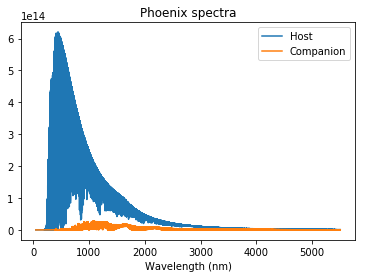

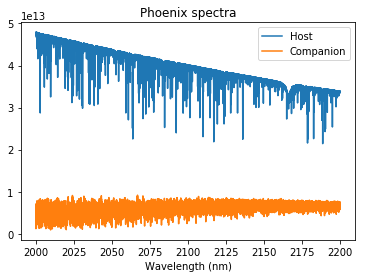

[  1.29551958e+12   1.71866679e+12   2.16364155e+12 ...,   6.37792734e+12
   6.42567058e+12   6.58968465e+12]
normal_ratio 6.82546


In [17]:
wav_model = fits.getdata("/home/jneal/Phd/data/PHOENIX-ALL/PHOENIX/WAVE_PHOENIX-ACES-AGSS-COND-2011.fits")
wav_model /= 10   # nm
host = "/home/jneal/Phd/data/PHOENIX-ALL/PHOENIX/HD30501-lte05200-4.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits"
companion = "/home/jneal/Phd/data/PHOENIX-ALL/PHOENIX/HD30501b-lte02500-5.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits"

host_f = fits.getdata(host)
comp_f = fits.getdata(companion)
plt.plot(wav_model, host_f, label="Host")
plt.plot(wav_model, comp_f, label="Companion")
plt.title("Phoenix spectra")
plt.xlabel("Wavelength (nm)")
plt.legend()

plt.show()

mask = (2000 < wav_model) & (wav_model < 2200)
wav_model = wav_model[mask] 
host_f = host_f[mask] 
comp_f = comp_f[mask] 


plt.plot(wav_model, host_f, label="Host")
plt.plot(wav_model, comp_f, label="Companion")
plt.title("Phoenix spectra")
plt.legend()
plt.xlabel("Wavelength (nm)")
plt.show()

spec_host = Spectrum(xaxis=wav_model, flux=host_f, header=fits.getheader(host))
spec_comp = Spectrum(xaxis=wav_model, flux=comp_f, header=fits.getheader(companion))

print(spec_comp.flux)
normal_ratio = spec_host / spec_comp
print("normal_ratio", np.mean(normal_ratio.flux))

In [18]:
def calc_alpha(model1, model2, chip=None):
    """Inherint flux ratio between the two.

    Need to ransform from spectrum per area to surface area of each star.

    For Phoenix Models - header parameters
    PHXLUM 	- [W]               Stellar luminosity
    BUNIT 	- 'erg/s/cm^2/cm' 	Unit of flux
    PHXREFF - [cm]              Effective stellar radius
    """
    def spec_area(spec):
        # BUNIT      'erg/s/cm^2/cm'   Unit of flux
        # PHXREFF    67354000000.0  [cm] Effective stellar radius
        area = np.pi * spec.header["PHXREFF"] ** 2
        return area
    
    area1 = spec_area(model1)
    area2 = spec_area(model2)
    
    area_ratio = area1 / area2
    print("area_ratio =", area_ratio)

    if chip is None:
        ratio = np.nanmean(model2.flux / model1.flux)
    else:
        raise NotImplementedError
    lum_ratio = model2.header["PHXLUM"] / model1.header["PHXLUM"]
    print("Lum ratio", lum_ratio)
    
    plt.subplot(211)
    plt.plot(model1.xaxis, model1.flux, label="model1")
    plt.plot(model1_b.xaxis, model1_b.flux, label="model1_b")
    plt.plot(model2.xaxis, model2.flux, label="model2")
    plt.plot(model2_b.xaxis, model2_b.flux, label="model2_b")
    plt.legend()

    plt.subplot(212)
    plt.plot(ratio, label="model2/model1")
   # plt.hlines(lum_ratio, 0, len(ratio), linestyle='--', label="luminosity ratio")
    plt.legend()

    plt.show()
    
    return model1, model2, lum_ratio


In [20]:
calc_alpha(spec_host, spec_comp, chip=None)

area_ratio = 13.69773628428171
Lum ratio 0.003905000563126478


NameError: name 'model1_b' is not defined

In [ ]:
# Create some Spectra

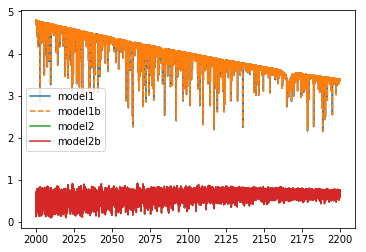

In [47]:

spec_host = Spectrum(xaxis=wav_model, flux=host_f/1e13, header=fits.getheader(host))
spec_comp = Spectrum(xaxis=wav_model, flux=comp_f/1e13, header=fits.getheader(companion))


spec_host2 = Spectrum(xaxis=wav_model, flux=host_f/1e13, header=fits.getheader(host))
spec_comp2 = Spectrum(xaxis=wav_model, flux=comp_f/1e13, header=fits.getheader(companion))

plt.plot(spec_host.xaxis, spec_host.flux, label="model1")
plt.plot(spec_host2.xaxis, spec_host2.flux, "--", label="model1b")
plt.plot(spec_comp.xaxis, spec_comp.flux, label="model2")
plt.plot(spec_comp2.xaxis, spec_comp2.flux, label="model2b")
plt.legend()
plt.show()

In [48]:
# Get Radius and determine area

In [49]:
r_host = spec_host.header["PHXREFF"] / 1e11
r_comp = spec_comp.header["PHXREFF"] / 1e11
print("r_host =", r_host, "\nr_comp =", r_comp)
print(type(r_host))
a_host = np.pi * r_host ** 2 
a_comp = np.pi * r_comp ** 2 

print("a_host =", a_host, "\na_comp =", a_comp)

print("a_ratio =", a_host/ a_comp, "or",  a_comp / a_host)


r_host = 0.58421 
r_comp = 0.15785
<class 'float'>
a_host = 1.072229732453029 
a_comp = 0.07827787819827013
a_ratio = 13.69773628428171 or 0.073004763651897


1.072229732453029e+22 7.827787819827014e+20 0.073004763651897 13.69773628428171


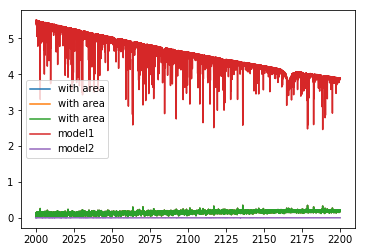

In [56]:

print(area1, area2, area2/area1, area1/area2)
spec_host.flux = spec_host.flux  * a_host
spec_comp.flux = spec_comp.flux * a_comp

spec_ratio = spec_comp / spec_host
spec_ratio2 = spec_comp2 / spec_host2
plt.plot(spec_host.xaxis, spec_host.flux, label="model1")
#plt.plot(spec_host2.xaxis, spec_host2.flux / 1e4, "--", label="model1b")
plt.plot(spec_comp.xaxis, spec_comp.flux, label="model2")
plt.legend()
plt.show()

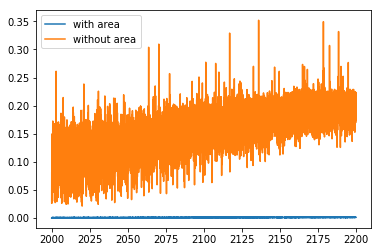

In [57]:

plt.plot(spec_ratio.xaxis, spec_ratio.flux, label="with area")
plt.plot(spec_ratio2.xaxis, spec_ratio2.flux, label="without area")
plt.legend()
plt.show()

In [62]:
np.mean(spec_ratio2.flux / spec_ratio.flux)

187.62794